In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display

In [35]:
df = pd.read_csv('ventes_luxe_détaillées.csv', sep=';')

df["Date"] = pd.to_datetime(df["Date"])

In [36]:
display(df.columns,df)
display(df)

Index(['Date', 'Catégorie_Produit', 'Canal_Vente', 'Événement_Spécial', 'Mois',
       'Année', 'Montant_Ventes'],
      dtype='object')

,Date,Catégorie_Produit,Canal_Vente,Événement_Spécial,Mois,Année,Montant_Ventes
0,2018-01-01,Mode,En ligne,0,1,2018,1207
1,2018-01-01,Mode,Boutique Physique,0,1,2018,1134
2,2018-01-01,Mode,Ventes Privées,0,1,2018,1224
3,2018-01-01,Mode,Grands Magasins,0,1,2018,1325
4,2018-01-01,Accessoires,En ligne,0,1,2018,1123
...,...,...,...,...,...,...,...
43819,2022-12-31,Montres,Grands Magasins,1,12,2022,1645
43820,2022-12-31,Maroquinerie,En ligne,1,12,2022,1680
43821,2022-12-31,Maroquinerie,Boutique Physique,1,12,2022,1669
43822,2022-12-31,Maroquinerie,Ventes Privées,1,12,2022,1269


,Date,Catégorie_Produit,Canal_Vente,Événement_Spécial,Mois,Année,Montant_Ventes
0,2018-01-01,Mode,En ligne,0,1,2018,1207
1,2018-01-01,Mode,Boutique Physique,0,1,2018,1134
2,2018-01-01,Mode,Ventes Privées,0,1,2018,1224
3,2018-01-01,Mode,Grands Magasins,0,1,2018,1325
4,2018-01-01,Accessoires,En ligne,0,1,2018,1123
...,...,...,...,...,...,...,...
43819,2022-12-31,Montres,Grands Magasins,1,12,2022,1645
43820,2022-12-31,Maroquinerie,En ligne,1,12,2022,1680
43821,2022-12-31,Maroquinerie,Boutique Physique,1,12,2022,1669
43822,2022-12-31,Maroquinerie,Ventes Privées,1,12,2022,1269


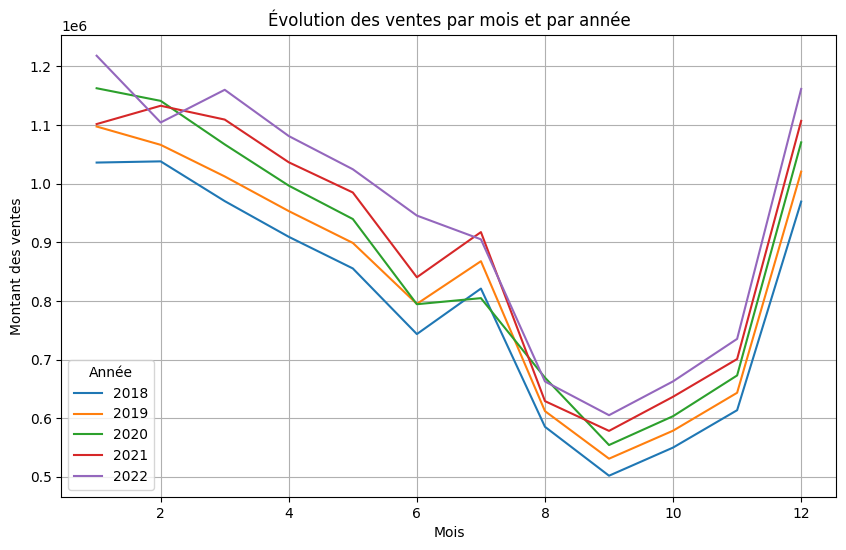

In [37]:
# Grouper les données par mois et année et calculer la somme des ventes
df_monthly_sales = df.groupby(['Année', 'Mois'])['Montant_Ventes'].sum().reset_index()

# Créer le graphique
plt.figure(figsize=(10, 6))
for year in df_monthly_sales['Année'].unique():
    data = df_monthly_sales[df_monthly_sales['Année'] == year]
    plt.plot(data['Mois'], data['Montant_Ventes'], label=str(year))

plt.title("Évolution des ventes par mois et par année")
plt.xlabel("Mois")
plt.ylabel("Montant des ventes")
plt.legend(title="Année")
plt.grid(True)
plt.show()

In [ ]:
# Calcul de la répartition des ventes par catégorie de produit
sales_by_category = df.groupby('Catégorie_Produit')['Montant_Ventes'].sum()

# Création du diagramme en secteurs
plt.figure(figsize=(8, 8))
sales_by_category.plot.pie(autopct='%1.1f%%', startangle=140)
plt.title("Répartition des ventes par catégorie de produit")
plt.ylabel("")  # Cache l'étiquette de l'axe y
plt.show()